<a href="https://colab.research.google.com/github/anandaviana/Mapeamento-Trackers/blob/main/Mapeamento_de_trackers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mapeamento de trackers

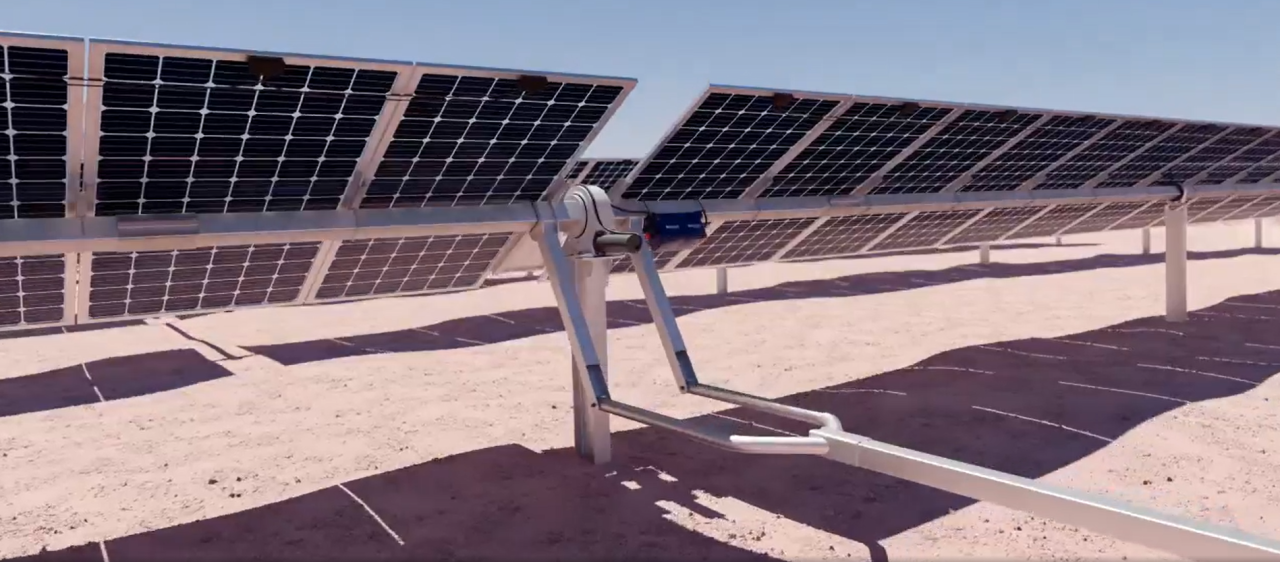

Script para realizar a transferência de informações entre arquivos '.xlsx' de rastreamento de equipamentos de usina solar para arquivo base da empresa de monitoramento, visando alimentar as análises de produção e perda de energia.



##Importações

In [1]:
import pandas as pd
import os

In [2]:
#Listando os arquivos existentes
arquivos = os.listdir('/content/drive/MyDrive/BT/input')
arquivos = sorted(arquivos)
print(arquivos)

['novo_Rastreabilidade_de_Equipamentos_TUC20.xlsx', 'novo_Rastreabilidade_de_Equipamentos_TUC21.xlsx', 'novo_Rastreabilidade_de_Equipamentos_TUC22.xlsx', 'novo_Rastreabilidade_de_Equipamentos_TUC23.xlsx', 'novo_Rastreabilidade_de_Equipamentos_TUC24.xlsx', 'novo_Rastreabilidade_de_Equipamentos_TUC25.xlsx', 'novo_Rastreabilidade_de_Equipamentos_TUC26.xlsx', 'novo_TrackersIds.xlsx']


In [ ]:
#Abrindo o arquivo base
df_base = pd.read_excel('/content/drive/MyDrive/BT/novo_TrackersIds.xlsx')

In [ ]:
#Verificando os arquivos de rastreamento
df_list =[]
for arquivo in arquivos:
  if 'novo_Rastr' in arquivo:
    caminho_arquivo = os.path.join('/content/drive/MyDrive/BT/input', arquivo)

    # Verificando se o arquivo existe antes de tentar abri-lo
    if os.path.exists(caminho_arquivo):
      sheets = pd.read_excel(caminho_arquivo, sheet_name=None)
      for sheet_name, df in sheets.items():
        df_list.append(df)  # Adiciona os DataFrames à lista
  else:
      print(f"Arquivo {arquivo} não adicionado!")

Arquivo Rastreabilidade_de_Equipamentos_TUC20.xlsx não adicionado!
Arquivo Rastreabilidade_de_Equipamentos_TUC21.xlsx não adicionado!
Arquivo Rastreabilidade_de_Equipamentos_TUC22.xlsx não adicionado!
Arquivo Rastreabilidade_de_Equipamentos_TUC23.xlsx não adicionado!
Arquivo Rastreabilidade_de_Equipamentos_TUC24.xlsx não adicionado!
Arquivo Rastreabilidade_de_Equipamentos_TUC25.xlsx não adicionado!
Arquivo Rastreabilidade_de_Equipamentos_TUC26.xlsx não adicionado!
Arquivo Trackers-anonim.py não adicionado!
Arquivo TrackersIds.xlsx não adicionado!
Arquivo TrackersMapeados.xlsx não adicionado!
Arquivo nomenclaturaTUC - Copia.png não adicionado!
Arquivo novo_TrackersIds.xlsx não adicionado!


In [ ]:
#Unindo os arquivos de rastreamento em um único
df_rastr_total = pd.concat(df_list, ignore_index=True)
df_rastr_total.head()

,Unnamed: 0,UFV,SUBCAMPO,ELETROCENTRO,INVERSOR,SEÇÃO,STRING,TRACKER
0,0,3,3.1,P01266/0226G17,TUC20-STS1-LVA-INV01,1,TUC20-STS1-LVA-INV01-ST01,TUC20-STS1-TR-AA-001
1,1,3,3.1,P01266/0226G17,TUC20-STS1-LVA-INV01,1,TUC20-STS1-LVA-INV01-ST02,TUC20-STS1-TR-AA-001
2,2,3,3.1,P01266/0226G17,TUC20-STS1-LVA-INV01,1,TUC20-STS1-LVA-INV01-ST03,TUC20-STS1-TR-AA-001
3,3,3,3.1,P01266/0226G17,TUC20-STS1-LVA-INV01,1,TUC20-STS1-LVA-INV01-ST04,TUC20-STS1-TR-AA-001
4,4,3,3.1,P01266/0226G17,TUC20-STS1-LVA-INV01,1,TUC20-STS1-LVA-INV01-ST05,TUC20-STS1-TR-AB-002


In [ ]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6466 entries, 0 to 6465
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6466 non-null   int64  
 1   ObjectId    6466 non-null   int64  
 2   Key         6466 non-null   object 
 3   Inverters   0 non-null      float64
dtypes: float64(1), int64(2), object(1)
memory usage: 202.2+ KB


## Tratando as colunas "chave"

In [ ]:
df_base['Inverters'] = df_base['Inverters'].astype(str)

In [ ]:
#Salvando as keys originais
keys_originais = df_base['Key']
print(keys_originais)

0       TUC20-STS1-TR-AA-001
1       TUC20-STS1-TR-AB-002
2       TUC20-STS1-TR-AC-003
3       TUC20-STS1-TR-AD-004
4       TUC20-STS1-TR-AE-005
                ...         
6461    TUC20-STS5-TR-AB-002
6462    TUC20-STS5-TR-AC-003
6463    TUC20-STS5-TR-AD-004
6464    TUC20-STS5-TR-AE-005
6465    TUC20-STS5-TR-AF-006
Name: Key, Length: 6466, dtype: object


In [ ]:
#Verificando o comprimento das strings na coluna 'Key'
df_base['Key'].apply(len).head()

,Key
0,20
1,20
2,20
3,20
4,20


In [ ]:
# Removendo os caracteres nas posições 14, 15 e 16 da base - que são divergentes entre a base e os demais arquivos
df_base['Key'] = df_base['Key'].apply(lambda x: x[:13] + x[16:] if len(x) == 20 else x)

df_base['Key'].head()


,Key
0,TUC20-STS1-TR-001
1,TUC20-STS1-TR-002
2,TUC20-STS1-TR-003
3,TUC20-STS1-TR-004
4,TUC20-STS1-TR-005


In [ ]:
#Removendo colunas 'unnamed'
df_rastr_total = df_rastr_total.loc[:, ~df_rastr_total.columns.str.contains('^Unnamed')]

In [ ]:
df_rastr_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4480 entries, 0 to 4479
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   UFV           4480 non-null   int64  
 1   SUBCAMPO      4480 non-null   float64
 2   ELETROCENTRO  3200 non-null   object 
 3   INVERSOR      4480 non-null   object 
 4   SEÇÃO         4480 non-null   int64  
 5   STRING        4480 non-null   object 
 6   TRACKER       4480 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 245.1+ KB


In [ ]:
#Verificando o comprimento das strings na coluna 'Key'
df_rastr_total['TRACKER'].apply(len).head()

,TRACKER
0,20
1,20
2,20
3,20
4,20


In [ ]:
df_rastr_total['TRACKER'] = df_rastr_total['TRACKER'].astype(str).str.strip().str.upper()

In [ ]:
#Padronizando com 20 caracteres as strings com 0 faltando
df_rastr_total['TRACKER'] = df_rastr_total['TRACKER'].apply(lambda x: x[:17] + '0' + x[17:] if len(x) == 19 else x)

In [ ]:
# Removendo os caracteres nas posições 14, 15 e 16 do arquivo - que são divergentes entre a base e os demais arquivos
df_rastr_total['TRACKER'] = df_rastr_total['TRACKER'].apply(lambda x: x[:13] + x[16:] if len(x) == 20 else x)

df_rastr_total['TRACKER'].head(25)

,TRACKER
0,TUC20-STS1-TR-001
1,TUC20-STS1-TR-001
2,TUC20-STS1-TR-001
3,TUC20-STS1-TR-001
4,TUC20-STS1-TR-002
5,TUC20-STS1-TR-002
6,TUC20-STS1-TR-002
7,TUC20-STS1-TR-002
8,TUC20-STS1-TR-003
9,TUC20-STS1-TR-003


## Mapeando os trackers

In [ ]:
# Agrupa por 'TRACKER' e concatena os valores de 'INVERSOR'
df_rastr_total['INVERSORES_AGRUPADOS'] = df_rastr_total.groupby('TRACKER')['INVERSOR'].transform(lambda x: ', '.join(x.unique()))

# Agora, removemos as duplicatas de 'TRACKER' mantendo apenas uma linha para cada 'TRACKER'
df_rastr_total = df_rastr_total.drop_duplicates(subset='TRACKER')[['TRACKER', 'INVERSORES_AGRUPADOS']]

# Exibe as primeiras linhas para verificar
df_rastr_total.head(30)

,TRACKER,INVERSORES_AGRUPADOS
0,TUC20-STS1-TR-001,TUC20-STS1-LVA-INV01
4,TUC20-STS1-TR-002,TUC20-STS1-LVA-INV01
8,TUC20-STS1-TR-003,TUC20-STS1-LVA-INV01
12,TUC20-STS1-TR-004,TUC20-STS1-LVA-INV01
16,TUC20-STS1-TR-005,TUC20-STS1-LVA-INV01
20,TUC20-STS1-TR-006,"TUC20-STS1-LVA-INV01, TUC20-STS1-LVA-INV02"
24,TUC20-STS1-TR-007,TUC20-STS1-LVA-INV02
28,TUC20-STS1-TR-008,TUC20-STS1-LVA-INV02
32,TUC20-STS1-TR-009,TUC20-STS1-LVA-INV02
36,TUC20-STS1-TR-010,TUC20-STS1-LVA-INV02


In [ ]:
df_rastr_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1127 entries, 0 to 4476
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   TRACKER               1127 non-null   object
 1   INVERSORES_AGRUPADOS  1127 non-null   object
dtypes: object(2)
memory usage: 26.4+ KB


In [ ]:
df_base.head(25)

,Unnamed: 0,ObjectId,Key,Inverters
0,0,1271564465695729920,TUC20-STS1-TR-001,nan
1,1,1271565119394789888,TUC20-STS1-TR-002,nan
2,2,1271565119394789888,TUC20-STS1-TR-003,nan
3,3,1271565119394789888,TUC20-STS1-TR-004,nan
4,4,1271565119394789888,TUC20-STS1-TR-005,nan
5,5,1271565119394789888,TUC20-STS1-TR-006,nan
6,6,1271565119394789888,TUC20-STS1-TR-007,nan
7,7,1271565119394789888,TUC20-STS1-TR-008,nan
8,8,1271565119394789888,TUC20-STS1-TR-009,nan
9,9,1271565119394789888,TUC20-STS1-TR-010,nan


In [ ]:
df_rastr_total.head(25)


,TRACKER,INVERSORES_AGRUPADOS
0,TUC20-STS1-TR-001,TUC20-STS1-LVA-INV01
4,TUC20-STS1-TR-002,TUC20-STS1-LVA-INV01
8,TUC20-STS1-TR-003,TUC20-STS1-LVA-INV01
12,TUC20-STS1-TR-004,TUC20-STS1-LVA-INV01
16,TUC20-STS1-TR-005,TUC20-STS1-LVA-INV01
20,TUC20-STS1-TR-006,"TUC20-STS1-LVA-INV01, TUC20-STS1-LVA-INV02"
24,TUC20-STS1-TR-007,TUC20-STS1-LVA-INV02
28,TUC20-STS1-TR-008,TUC20-STS1-LVA-INV02
32,TUC20-STS1-TR-009,TUC20-STS1-LVA-INV02
36,TUC20-STS1-TR-010,TUC20-STS1-LVA-INV02


In [ ]:
# Preenchendo a coluna 'Inverters' no dataframe base com os valores de 'INVERSORES_AGRUPADOS' de df_rastr_total
df_base['Inverters'] = df_base['Key'].map(df_rastr_total.set_index('TRACKER')['INVERSORES_AGRUPADOS'])

df_base[['Key', 'Inverters']].head(25)

,Key,Inverters
0,TUC20-STS1-TR-001,TUC20-STS1-LVA-INV01
1,TUC20-STS1-TR-002,TUC20-STS1-LVA-INV01
2,TUC20-STS1-TR-003,TUC20-STS1-LVA-INV01
3,TUC20-STS1-TR-004,TUC20-STS1-LVA-INV01
4,TUC20-STS1-TR-005,TUC20-STS1-LVA-INV01
5,TUC20-STS1-TR-006,"TUC20-STS1-LVA-INV01, TUC20-STS1-LVA-INV02"
6,TUC20-STS1-TR-007,TUC20-STS1-LVA-INV02
7,TUC20-STS1-TR-008,TUC20-STS1-LVA-INV02
8,TUC20-STS1-TR-009,TUC20-STS1-LVA-INV02
9,TUC20-STS1-TR-010,TUC20-STS1-LVA-INV02


In [ ]:
#Adicionando as chaves originais
df_base['Key Original'] = keys_originais

In [ ]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6466 entries, 0 to 6465
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    6466 non-null   int64 
 1   ObjectId      6466 non-null   int64 
 2   Key           6466 non-null   object
 3   Inverters     1127 non-null   object
 4   Key Original  6466 non-null   object
dtypes: int64(2), object(3)
memory usage: 252.7+ KB


In [ ]:
#Encontando os nulos para verificar problemas na base do cliente

inverters_nulos = df_base[df_base['Inverters'].isnull()]

# Exibir as linhas com valores nulos na coluna 'Inverters'
print(inverters_nulos[['Key', 'Inverters']])

                    Key Inverters
161   TUC20-STS2-TR-001       NaN
162   TUC20-STS2-TR-002       NaN
163   TUC20-STS2-TR-003       NaN
164   TUC20-STS2-TR-004       NaN
165   TUC20-STS2-TR-005       NaN
...                 ...       ...
6461  TUC20-STS5-TR-002       NaN
6462  TUC20-STS5-TR-003       NaN
6463  TUC20-STS5-TR-004       NaN
6464  TUC20-STS5-TR-005       NaN
6465  TUC20-STS5-TR-006       NaN

[5339 rows x 2 columns]


In [ ]:
#Dataframe base com os valores de trackers preenchidos
df_base = df_base[['ObjectId', 'Key Original', 'Inverters', 'Key']]
df_base.head()

,ObjectId,Key Original,Inverters,Key
0,1271564465695729920,TUC20-STS1-TR-AA-001,TUC20-STS1-LVA-INV01,TUC20-STS1-TR-001
1,1271565119394789888,TUC20-STS1-TR-AB-002,TUC20-STS1-LVA-INV01,TUC20-STS1-TR-002
2,1271565119394789888,TUC20-STS1-TR-AC-003,TUC20-STS1-LVA-INV01,TUC20-STS1-TR-003
3,1271565119394789888,TUC20-STS1-TR-AD-004,TUC20-STS1-LVA-INV01,TUC20-STS1-TR-004
4,1271565119394789888,TUC20-STS1-TR-AE-005,TUC20-STS1-LVA-INV01,TUC20-STS1-TR-005


In [ ]:
#Salvando a nova base em .csv

df_base.to_excel('/content/drive/MyDrive/BT/output/TrackersMapeados.xlsx', index=False)